# **Desafio Data science INDICIUM - RENAN CARNEIRO COSTA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###**2.2 Visualização inicial dos dados**

In [ ]:
df = pd.read_csv('data/desafio_indicium_imdb.csv')
display(df.head())

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### **2.3 Visualização de quantidade de linhas e colunas**

In [ ]:
df.shape
print("Número de linhas", df.shape[0])
print("Número de colunas", df.shape[1])

Número de linhas 999
Número de colunas 16


###**2.4 Análise inicial dos dados**

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
porcentagem_vazios = df.isnull().sum() * 100 / len(df)
porcentagem_vazios


,0
Unnamed: 0,0.000000
Series_Title,0.000000
Released_Year,0.000000
Certificate,10.110110
Runtime,0.000000
Genre,0.000000
IMDB_Rating,0.000000
Overview,0.000000
Meta_score,15.715716
Director,0.000000


<Axes: >

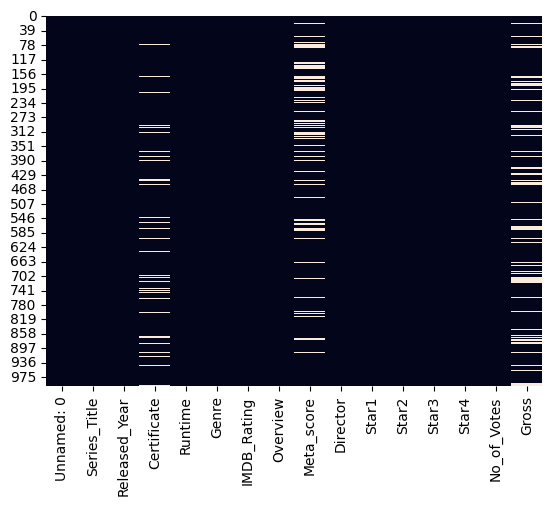

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

### **2.5 Limpeza, transformação e preenchimendo dos dados**

**2.5.1 Limpeza dos dados**

Retirada de colunas desnecessárias, remoção de linhas com lançamento nulo e conversão para colunas numéricas

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

df = df[df["Released_Year"].notna()]

df["Runtime"] = pd.to_numeric(df["Runtime"].str.extract(r"(\d+)")[0], errors="coerce")

df["Gross"] = pd.to_numeric(df["Gross"].astype(str).str.replace(",", ""), errors="coerce")

df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

**2.5.2 Transformação de dados**

Criação de gênero principal e coluna binária

In [ ]:
df["Primary_Genre"] = df["Genre"].apply(lambda g: g.split(",")[0].strip() if pd.notna(g) else None)


**2.5.3 Transformação de dados**

Preenchimento de valores ausentes pela média e por zero

In [ ]:
df["Certificate"].fillna("Unknown", inplace=True)

df["Meta_score"] = df.groupby("Primary_Genre")["Meta_score"].transform(
    lambda scores: scores.fillna(scores.mean())
)

df["Gross"].fillna(0, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     997 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
 15  Primary_Genre  999 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 125.0+ KB


/tmp/ipython-input-3983378701.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Certificate"].fillna("Unknown", inplace=True)
/tmp/ipython-input-3983378701.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**2.5.4 Transformação de dados**

Preenchimento de valores ausentes pela média e por zero

In [ ]:
isDuplicado = df.duplicated().any()
print("Há valores duplicados? ",isDuplicado)

Há valores duplicados?  False


## **Gerar estatisticas do dataset**

In [ ]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,997.000000,9.990000e+02,9.990000e+02
mean,1991.214429,122.871872,7.947948,77.939614,2.716214e+05,5.656510e+07
std,23.308539,28.101227,0.272290,11.417656,3.209126e+05,1.032860e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,4.422285e+05
50%,1999.000000,119.000000,7.900000,78.720000,1.383560e+05,1.068028e+07
75%,2009.000000,137.000000,8.100000,86.000000,3.731675e+05,6.157656e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


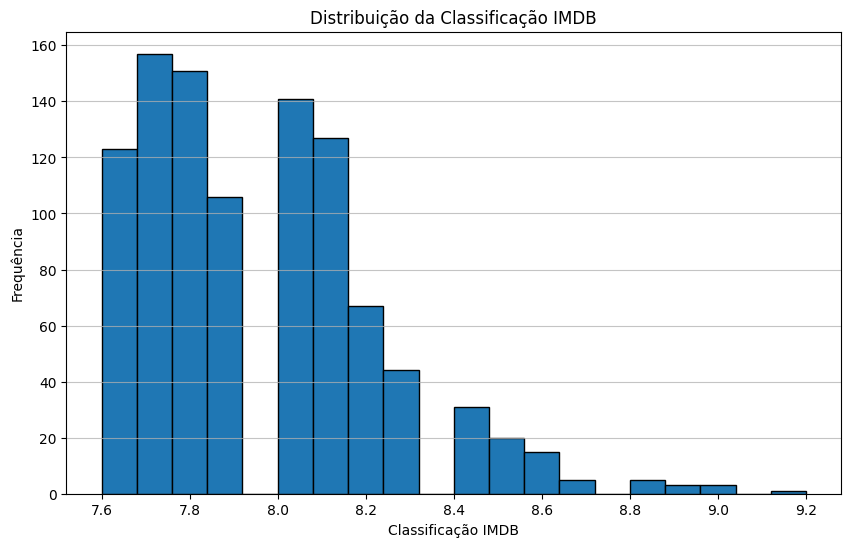

,Runtime,Gross
0,175,134966411.0
1,152,534858444.0
2,202,57300000.0
3,96,4360000.0
4,201,377845905.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['IMDB_Rating'], bins=20, edgecolor='black')
plt.title('Distribuição da Classificação IMDB')
plt.xlabel('Classificação IMDB')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


display(df[['Runtime', 'Gross']].head())

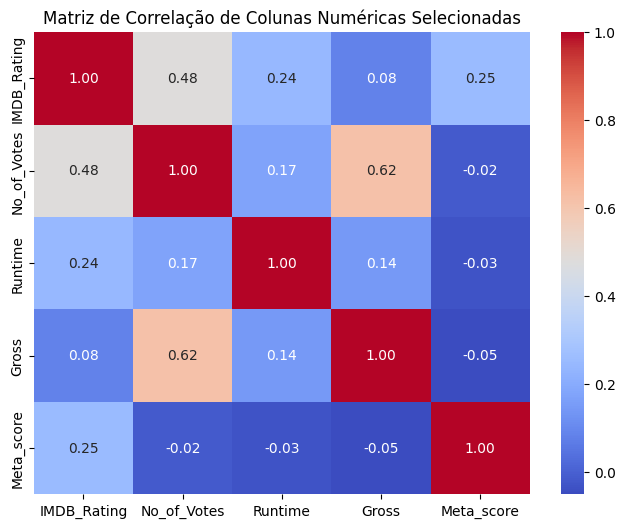

In [ ]:
numerical_cols = ['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross', 'Meta_score']
correlation_matrix = df[numerical_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação de Colunas Numéricas Selecionadas')
plt.show()

/tmp/ipython-input-2283567717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_top.index, y=genre_gross_top.values, palette='viridis')


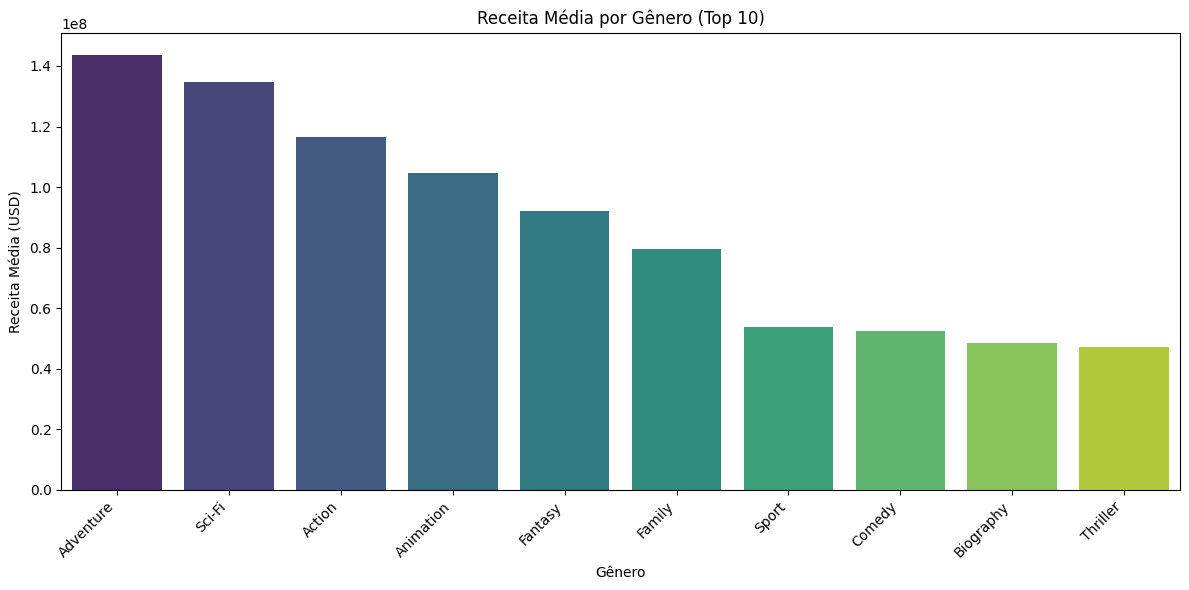

/tmp/ipython-input-2283567717.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating_top.index, y=genre_rating_top.values, palette='viridis')


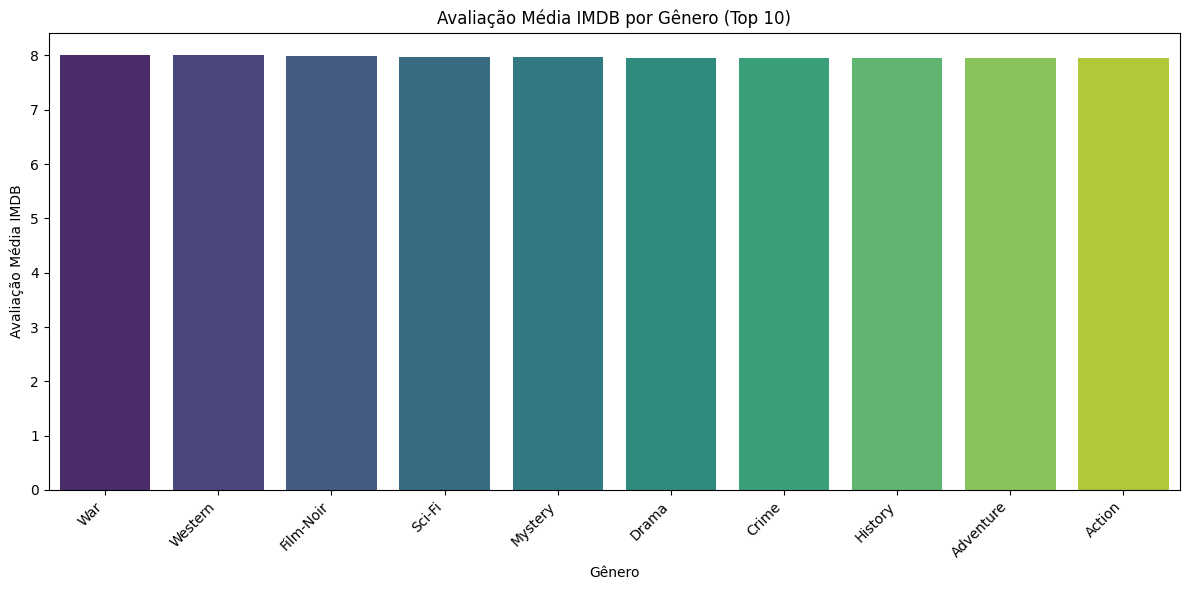

In [ ]:
genre_data = df.copy()
genre_data['Genre'] = genre_data['Genre'].str.split(', ')
genre_data_exploded = genre_data.explode('Genre')

genre_gross = genre_data_exploded.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
genre_rating = genre_data_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

genre_gross_top = genre_gross.head(10)
genre_rating_top = genre_rating.head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross_top.index, y=genre_gross_top.values, palette='viridis')
plt.title('Receita Média por Gênero (Top 10)')
plt.xlabel('Gênero')
plt.ylabel('Receita Média (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_rating_top.index, y=genre_rating_top.values, palette='viridis')
plt.title('Avaliação Média IMDB por Gênero (Top 10)')
plt.xlabel('Gênero')
plt.ylabel('Avaliação Média IMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'Frequência de Diretores:'

,count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Billy Wilder,9
Stanley Kubrick,9
Woody Allen,9
Clint Eastwood,8


'Receita Média por Diretor (Top 10):'

,Gross,IMDB_Rating
Director,,
Anthony Russo,5.512599e+08,8.075000
Gareth Edwards,5.321773e+08,7.800000
J.J. Abrams,4.743903e+08,7.833333
Josh Cooley,4.340380e+08,7.800000
Roger Allers,4.227838e+08,8.500000
Tim Miller,3.630707e+08,8.000000
James Gunn,3.614949e+08,7.800000
James Cameron,3.496473e+08,8.080000
Byron Howard,3.412682e+08,8.000000


'Avaliação Média IMDB por Diretor (Top 10):'

,Gross,IMDB_Rating
Director,,
Lana Wachowski,171479930.0,8.7
Irvin Kershner,290475067.0,8.7
Thomas Kail,0.0,8.6
Masaki Kobayashi,0.0,8.6
George Lucas,322740140.0,8.6
Frank Darabont,136801374.0,8.6
Sudha Kongara,0.0,8.6
Fernando Meirelles,7563397.0,8.6
Roberto Benigni,57598247.0,8.6


/tmp/ipython-input-2364493074.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_rating_top_10.index, y=director_rating_top_10['IMDB_Rating'], palette='viridis')


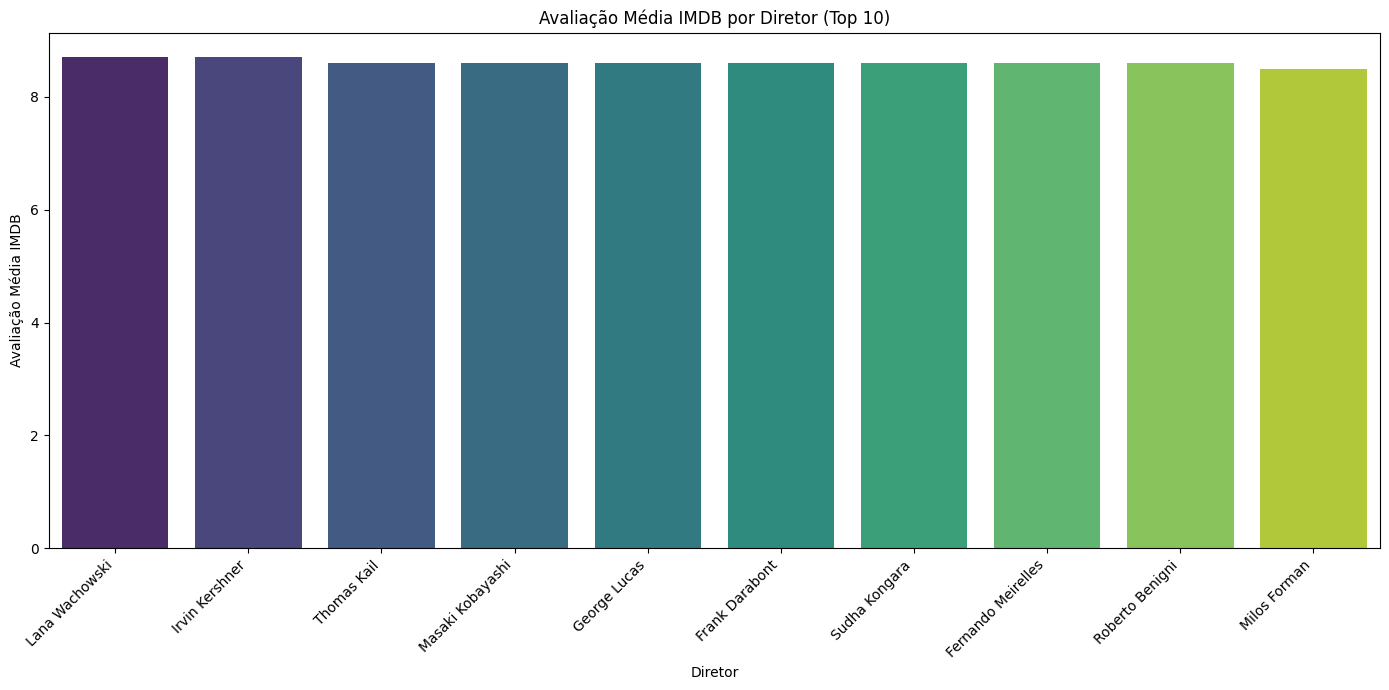

In [ ]:
director_counts = df['Director'].value_counts()
display("Frequência de Diretores:")
display(director_counts.head(10))

director_performance = df.groupby('Director')[['Gross', 'IMDB_Rating']].mean()

director_gross_top_10 = director_performance.sort_values(by='Gross', ascending=False).head(10)
director_rating_top_10 = director_performance.sort_values(by='IMDB_Rating', ascending=False).head(10)

display("Receita Média por Diretor (Top 10):")
display(director_gross_top_10)

display("Avaliação Média IMDB por Diretor (Top 10):")
display(director_rating_top_10)

plt.figure(figsize=(14, 7))
sns.barplot(x=director_rating_top_10.index, y=director_rating_top_10['IMDB_Rating'], palette='viridis')
plt.title('Avaliação Média IMDB por Diretor (Top 10)')
plt.xlabel('Diretor')
plt.ylabel('Avaliação Média IMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'Frequência da Estrela Principal (Star1):'

,count
Star1,
Tom Hanks,12
Robert De Niro,11
Al Pacino,10
Clint Eastwood,10
Humphrey Bogart,9
Leonardo DiCaprio,9
James Stewart,8
Christian Bale,8
Johnny Depp,8


'Receita Média por Estrela Principal (Top 10):'

,Gross,IMDB_Rating
Star1,,
Daisy Ridley,9.366622e+08,7.900000
Sam Worthington,7.605076e+08,7.800000
Joe Russo,5.512599e+08,8.075000
Felicity Jones,5.321773e+08,7.800000
Henry Thomas,4.351106e+08,7.800000
Craig T. Nelson,4.350114e+08,7.800000
Rob Minkoff,4.227838e+08,8.500000
Robert Downey Jr.,3.835734e+08,7.833333
Lee Unkrich,3.808433e+08,8.100000


'Avaliação Média IMDB por Estrela Principal (Top 10):'

,Gross,IMDB_Rating
Star1,,
John Travolta,1.079288e+08,8.90
Elijah Wood,3.453140e+08,8.80
Lilly Wachowski,1.714799e+08,8.70
Marlon Brando,7.228321e+07,8.65
Suriya,0.000000e+00,8.60
Lin-Manuel Miranda,0.000000e+00,8.60
Kátia Lund,7.563397e+06,8.60
Roberto Benigni,5.759825e+07,8.60
Daveigh Chase,1.005586e+07,8.60


/tmp/ipython-input-840229962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star1_gross_top_10.index, y=star1_gross_top_10['Gross'], palette='viridis')


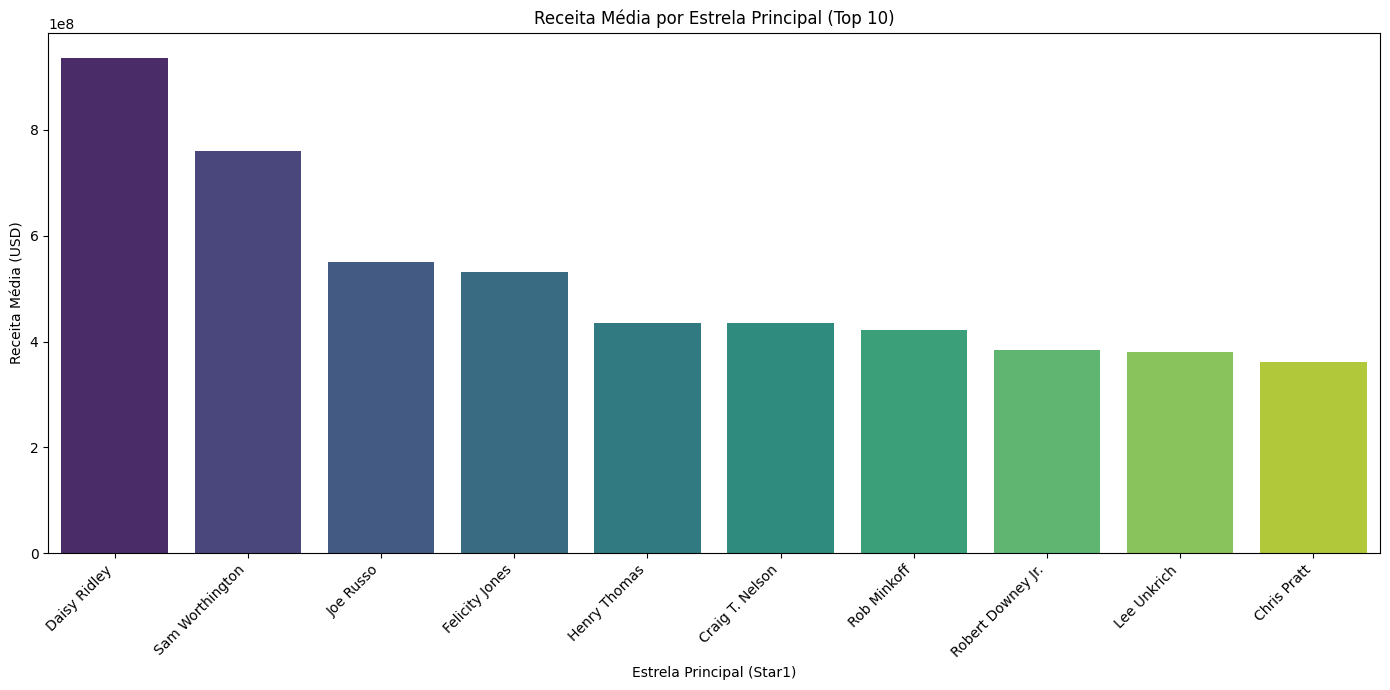

/tmp/ipython-input-840229962.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star1_rating_top_10.index, y=star1_rating_top_10['IMDB_Rating'], palette='viridis')


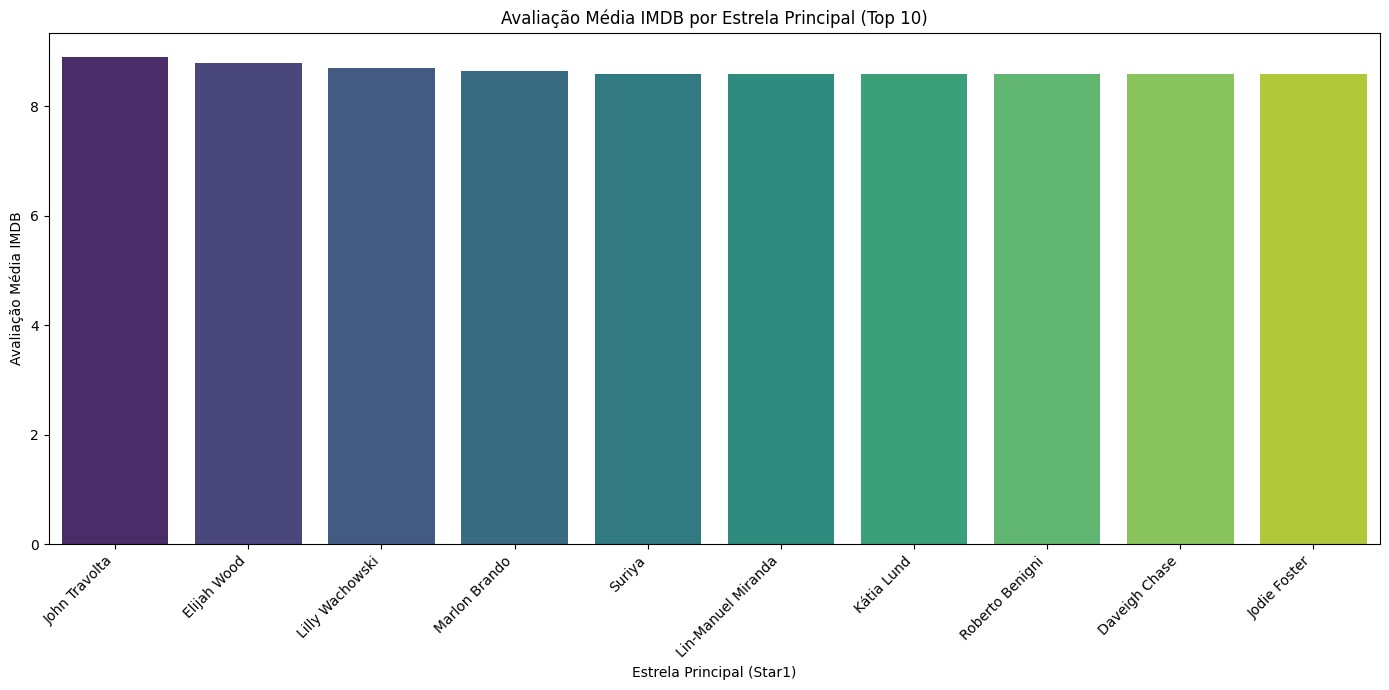

In [ ]:
star1_counts = df['Star1'].value_counts()
display("Frequência da Estrela Principal (Star1):")
display(star1_counts.head(10))

star1_performance = df.groupby('Star1')[['Gross', 'IMDB_Rating']].mean()

star1_gross_top_10 = star1_performance.sort_values(by='Gross', ascending=False).head(10)
star1_rating_top_10 = star1_performance.sort_values(by='IMDB_Rating', ascending=False).head(10)

display("Receita Média por Estrela Principal (Top 10):")
display(star1_gross_top_10)

display("Avaliação Média IMDB por Estrela Principal (Top 10):")
display(star1_rating_top_10)

plt.figure(figsize=(14, 7))
sns.barplot(x=star1_gross_top_10.index, y=star1_gross_top_10['Gross'], palette='viridis')
plt.title('Receita Média por Estrela Principal (Top 10)')
plt.xlabel('Estrela Principal (Star1)')
plt.ylabel('Receita Média (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=star1_rating_top_10.index, y=star1_rating_top_10['IMDB_Rating'], palette='viridis')
plt.title('Avaliação Média IMDB por Estrela Principal (Top 10)')
plt.xlabel('Estrela Principal (Star1)')
plt.ylabel('Avaliação Média IMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Quais são os principais fatores relacionados com alta expectativa de faturamento de um filme?**

A partir dos dados e padrões:

Número de votos (No_of_Votes): filmes mais populares tendem a faturar mais.

Nota IMDb e Meta_score: indicam qualidade percebida e maior chance de atrair público.

Diretores renomados: histórico de sucesso influencia o desempenho.

Elenco: nomes fortes no cast impactam bilheteria.

Gênero: ação, aventura e ficção científica, em especial com franquias, têm maior potencial de faturamento.

### **2.5 Analisando a coluna Overview (Sinopse do filme)**



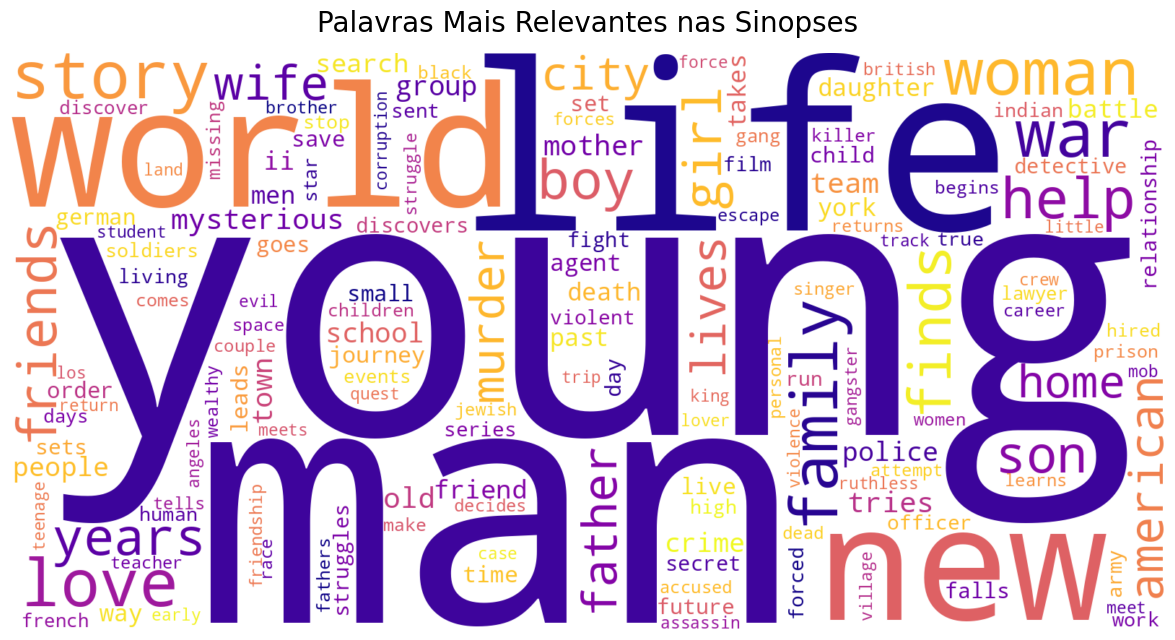

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import re

# Aplicação de limpeza dos dados, tirando caracteres
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_overview"] = df["Overview"].dropna().apply(clean_text)

# Vetorização e remoção de stopwords
vectorizer = CountVectorizer(
    stop_words="english",
    max_features=200
)

X = vectorizer.fit_transform(df["clean_overview"])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Cria uma nuvem de palavras das palavras mais frequentes
wordcloud = WordCloud(
    background_color="white",
    width=1600,
    height=800,
    max_words=150,
    colormap="plasma",
    random_state=42
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras Mais Relevantes nas Sinopses", fontsize=20, pad=15)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.pipeline import Pipeline

df['Genre_list'] = df['Genre'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre_list'])

X_train, X_test, y_train, y_test = train_test_split(
    df["Overview"], y, test_size=0.2, random_state=42
)

logreg = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    class_weight="balanced"
)

modelo = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=3000)),
    ("clf", MultiOutputClassifier(logreg))
])

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("\nRelatório por gênero (visão macro):")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

def predicao_por_genero(overview_text):
    pred = modelo.predict([overview_text])
    labels = mlb.inverse_transform(pred)
    return labels[0] if labels else []

# Tirei da planilha uma sinopse de filme para testar o modelo:
input_texto = "A sole survivor tells of the twisty events leading up to a horrific gun battle on a boat, which began when five criminals met at a seemingly random police lineup."
predicted_genres = predicao_por_genero(input_texto)

print("\nSinopse:", input_texto)
print("Gêneros previstos:", predicted_genres)



Relatório por gênero (visão macro):
              precision    recall  f1-score   support

      Action       0.47      0.41      0.44        34
   Adventure       0.64      0.35      0.45        40
   Animation       0.50      0.17      0.25        18
   Biography       0.40      0.24      0.30        25
      Comedy       0.39      0.33      0.36        46
       Crime       0.52      0.37      0.43        43
       Drama       0.84      0.84      0.84       157
      Family       0.12      0.20      0.15         5
     Fantasy       0.33      0.11      0.17         9
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00         8
      Horror       1.00      0.20      0.33        10
       Music       0.60      0.33      0.43         9
     Musical       0.00      0.00      0.00         4
     Mystery       0.60      0.26      0.36        23
     Romance       0.19      0.19      0.19        21
      Sci-Fi       1.00      0.36      0.53 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Previsão da nota do IMDb**
Pra prever a nota do IMDb, foi usado um modelo chamado Gradient Boosting Regressor. Ele funciona como várias árvores de decisão trabalhando em conjunto: cada árvore tenta corrigir os erros da anterior, e no fim elas formam uma previsão bem sólida.

As variáveis que foram usadas pra treinar o modelo foram:

Released_Year: o ano em que o filme saiu.

Runtime: a duração do filme.

Meta_score: a nota da crítica.

No_of_Votes: o número de votos no IMDb, que mostra o quanto o filme foi assistido.

Gross: o faturamento.

### **O tipo de problema:**
É de regressão, porque é preciso prever um número contínuo (a nota do IMDb).

### **Como avaliei o modelo:**

Usei o R² pra ver o quanto o modelo explica os dados.

Usei também o RMSE, que mede o erro médio das previsões.

### **Por que o Gradient Boosting foi escolhido:**

 Ele captura relações complexas entre variáveis.

Normalmente acerta mais que modelos simples, como regressão linear.

### **Contras**:
 É mais lento pra treinar.

 Não é tão fácil de interpretar.

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
X = df[features].copy()
y = df['IMDB_Rating']

X = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² do modelo: {r2:.4f}")
print(f"RMSE do modelo: {rmse:.4f}")

shawshank_raw = {
    'Released_Year': '1994',
    'Runtime': '142 min',
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

shawshank = pd.DataFrame([{
    'Released_Year': int(shawshank_raw['Released_Year']),
    'Runtime': float(shawshank_raw['Runtime'].split()[0]),
    'Meta_score': shawshank_raw['Meta_score'],
    'No_of_Votes': shawshank_raw['No_of_Votes'],
    'Gross': float(shawshank_raw['Gross'].replace(',', ''))
}])

shawshank_input = pd.DataFrame(SimpleImputer(strategy='mean').fit(X_train).transform(shawshank), columns=features)

pred = gb_model.predict(shawshank_input)
print(f"IMDB estimado para 'The Shawshank Redemption': {pred[0]:.4f}")


R² do modelo: 0.4276
RMSE do modelo: 0.1938
IMDB estimado para 'The Shawshank Redemption': 8.8246


In [ ]:
import pickle

model_filename = 'gradient_boosting_imdb_predictor.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(gb_model, file)